In [34]:
# Write a function to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Figures")
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import glob,os
import seaborn as sns

In [2]:
df_original=pd.read_csv('dataset.csv')
df_original.head(n=1)


,Unnamed: 0,Patient ID,Diagnosis,Pathes
0,0,12906,0,archive/12906/0/12906_idx5_x1051_y1301_class0.png


In [3]:
df_original=df_original.drop(labels='Unnamed: 0',axis=1)
df_original.head(n=1)

,Patient ID,Diagnosis,Pathes
0,12906,0,archive/12906/0/12906_idx5_x1051_y1301_class0.png


In [4]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df_original,test_size=0.3,random_state=8)

In [5]:
df_train.shape

(3500, 3)

In [6]:
from PIL import Image
# random_train['Pixels']=np.array(random_train['Pathes'].map(lambda x:np.asarray(open(x).resize((128,128)))))
# random_train['Pixels']=random_train.loc[:,['Pathes']].map(lambda x:np.asarray(open(x).resize((128,128))))
X_train_MLP=df_train['Pathes'].map(lambda x:np.asarray(Image.open(x).resize((50,50))))



In [7]:
X_train_MLP.shape

(3500,)

In [8]:
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
img_list = []
for i in range (0,len(X_train_MLP)):
    brain_img =np.array(X_train_MLP)[i]
    img_arr = img_to_array(brain_img).astype(np.float32)
    img_list.append(preprocess_input(img_arr))
X_scaled = np.array(img_list)

print(X_scaled.shape)

(3500, 50, 50, 3)


In [9]:
X_train_shape = X_scaled.shape[1]*X_scaled.shape[2]*X_scaled.shape[3]
X_Flatten = X_scaled.reshape(X_scaled.shape[0],X_train_shape)

In [10]:
X_Flatten.shape

(3500, 7500)

In [11]:
X_test_MLP=df_test["Pathes"].map(lambda x:np.asarray(Image.open(x).resize((50,50))))

In [12]:
image_list = []
for i in range (0,len(X_test_MLP)):
    brain_img =np.array(X_test_MLP)[i]
    img_arr = img_to_array(brain_img).astype(np.float32)
    image_list.append(preprocess_input(img_arr))
X_scaled_test = np.array(image_list)

print(X_scaled_test.shape)

(1500, 50, 50, 3)


In [13]:
X_test_shape = X_scaled_test.shape[1]*X_scaled.shape[2]*X_scaled.shape[3]
X_Flatten_test = X_scaled_test.reshape(X_scaled_test.shape[0],X_test_shape)

In [14]:
X_Flatten_test.shape

(1500, 7500)

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'l2', C = 0.0001, random_state = 0)

LR.fit(X_Flatten, np.array(df_train['Diagnosis']))
print(LR.score(X_Flatten, np.array(df_train['Diagnosis'])), LR.score(X_Flatten_test, np.array(df_test['Diagnosis'])))

0.7754285714285715 0.7786666666666666


In [16]:
from sklearn.metrics import classification_report

In [17]:
y_pred_LR = LR.predict(X_Flatten_test)

In [41]:
save_fig('Logistic Regression Performance Score')

Saving figure Logistic Regression Performance Score


<Figure size 432x288 with 0 Axes>

In [18]:
print(classification_report(y_pred_LR,np.array(df_test['Diagnosis'])))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       788
           1       0.75      0.79      0.77       712

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500



Saving figure Confusion_Matrix_LR


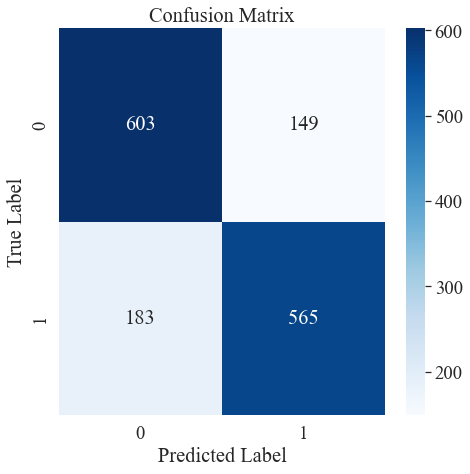

In [40]:
sns.set(font_scale=1.7)
plt.rcParams['font.family'] = "times new roman"

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(np.array(df_test['Diagnosis']), y_pred_LR)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [0, 1], 
                     columns = [0, 1])

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(top=0.5, bottom=0.1, hspace=0.5, wspace=0.2)
sns.heatmap(cm_df, annot = True, fmt="d", cmap="Blues")
#
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

#save_fig('Confusion_Matrix_Decision_Tree_GridSearch')
save_fig('Confusion_Matrix_LR')
plt.show()

<h1>PCA + Logistic Regression</h1>

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=450)

In [21]:
pca.fit(X_Flatten)

PCA(n_components=450)

In [22]:
x = pca.transform(X_Flatten)

In [23]:
x_test = pca.transform(X_Flatten_test)

In [27]:
LR = LogisticRegression(penalty = 'l2', C = 0.0001, random_state = 0)


In [28]:
LR.fit(x, np.array(df_train['Diagnosis']))

LogisticRegression(C=0.0001, random_state=0)

In [29]:
y_pred_LR = LR.predict(x_test)

In [42]:
save_fig('Logistic Regression_PCA Performance Score')

Saving figure Logistic Regression_PCA Performance Score


<Figure size 432x288 with 0 Axes>

In [30]:
print(classification_report(y_pred_LR,np.array(df_test['Diagnosis'])))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       786
           1       0.76      0.79      0.77       714

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500



Saving figure Confusion_Matrix_LR_PCA


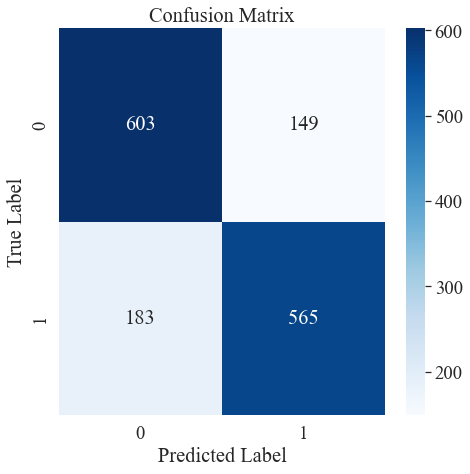

In [39]:
sns.set(font_scale=1.7)
plt.rcParams['font.family'] = "times new roman"

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(np.array(df_test['Diagnosis']), y_pred_LR)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [0, 1], 
                     columns = [0, 1])

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
fig.subplots_adjust(top=0.5, bottom=0.1, hspace=0.5, wspace=0.2)
sns.heatmap(cm_df, annot = True, fmt="d", cmap="Blues")
#
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

#save_fig('Confusion_Matrix_Decision_Tree_GridSearch')
save_fig('Confusion_Matrix_LR_PCA')
plt.show()